# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 1.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675966 sha256=a8a964ea4f47fa5224c48eb0fec2f05410ed67f1151d31ed13022979039cfc97
  Stored in directory: /Users/nishithapliyal/Library/Caches/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | juan griego
Processing Record 2 of Set 1 | namie
Processing Record 3 of Set 1 | kourou
Processing Record 4 of Set 1 | dudinka
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | mlada boleslav
Processing Record 10 of Set 1 | bayou cane
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | kandahar
Processing Record 13 of Set 1 | queenstown
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | reyes
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | iwanai
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | hamilton
Processing Record 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,juan griego,11.0817,-63.9655,31.07,74,52,6.69,VE,1720303731
1,namie,37.4833,141.0000,29.29,76,92,1.35,JP,1720303732
2,kourou,5.1552,-52.6478,28.03,84,99,3.51,GF,1720303734
3,dudinka,69.4058,86.1778,8.71,93,81,4.70,RU,1720303735
4,lompoc,34.6391,-120.4579,33.08,53,9,2.40,US,1720303569


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,juan griego,11.0817,-63.9655,31.07,74,52,6.69,VE,1720303731
1,namie,37.4833,141.0000,29.29,76,92,1.35,JP,1720303732
2,kourou,5.1552,-52.6478,28.03,84,99,3.51,GF,1720303734
3,dudinka,69.4058,86.1778,8.71,93,81,4.70,RU,1720303735
4,lompoc,34.6391,-120.4579,33.08,53,9,2.40,US,1720303569


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [34]:
current_date = datetime.now().date()
current_date

datetime.date(2024, 7, 6)

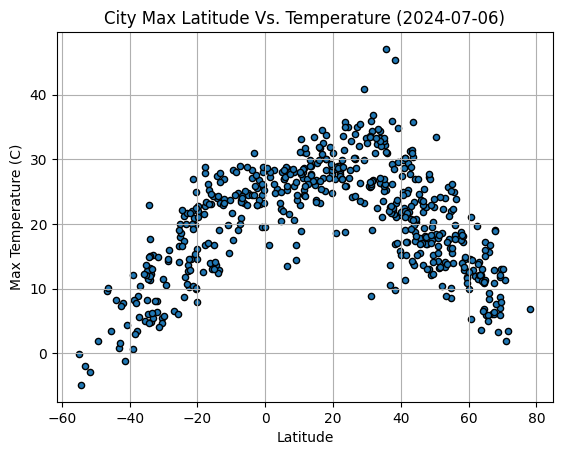

In [37]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat', 'Max Temp', kind = 'scatter', xlabel = 'Latitude', ylabel = 'Max Temperature (C)', 
                  grid = True, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude Vs. Temperature ({current_date})" )

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

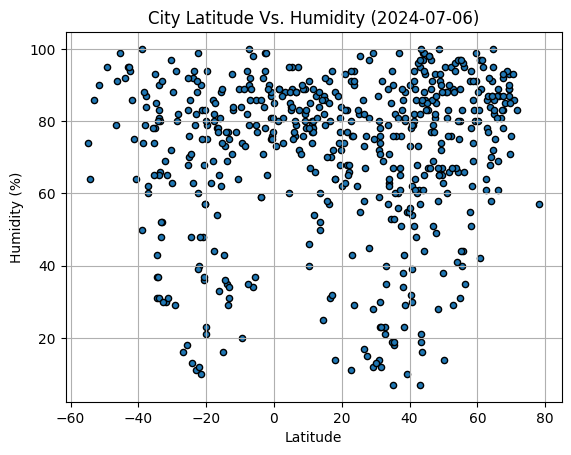

In [38]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat', 'Humidity', kind = 'scatter', xlabel = 'Latitude', ylabel = 'Humidity (%)', 
                  grid = True, edgecolor = 'black')


# Incorporate the other graph properties
plt.title(f"City Latitude Vs. Humidity ({current_date})" )

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

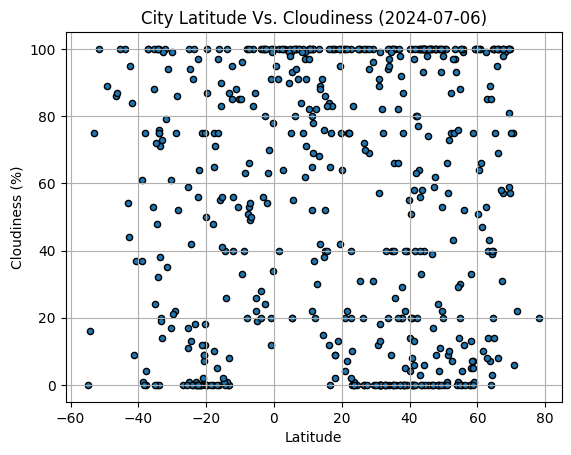

In [40]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat', 'Cloudiness', kind = 'scatter', xlabel = 'Latitude', ylabel = 'Cloudiness (%)', 
                  grid = True, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude Vs. Cloudiness ({current_date})" )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

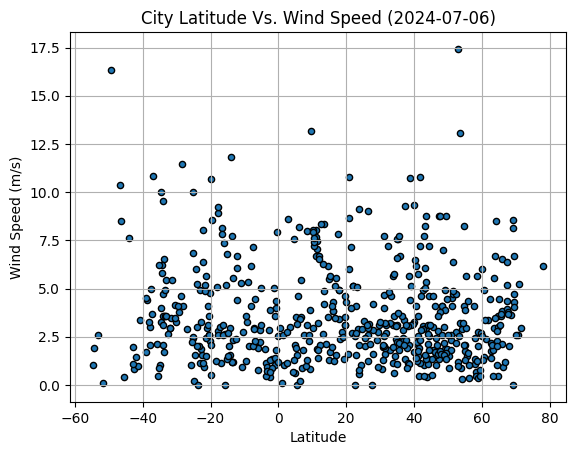

In [41]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat', 'Wind Speed', kind = 'scatter', xlabel = 'Latitude', ylabel = 'Wind Speed (m/s)', 
                  grid = True, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude Vs. Wind Speed ({current_date})" )

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def linregressplots(x_values, y_values, y_label, line_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title('Latitude vs ' + y_label)
    plt.annotate(line_eq,line_loc,fontsize=15,color="red")

    print(f"The r^2 value is: {rvalue**2}")


In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,juan griego,11.0817,-63.9655,31.07,74,52,6.69,VE,1720303731
1,namie,37.4833,141.0000,29.29,76,92,1.35,JP,1720303732
2,kourou,5.1552,-52.6478,28.03,84,99,3.51,GF,1720303734
3,dudinka,69.4058,86.1778,8.71,93,81,4.70,RU,1720303735
4,lompoc,34.6391,-120.4579,33.08,53,9,2.40,US,1720303569


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,1.93,95,89,16.35,TF,1720303737
6,blackmans bay,-43.0167,147.3167,0.85,95,54,1.95,AU,1720303738
7,edinburgh of the seven seas,-37.0676,-12.3116,10.44,60,100,10.83,SH,1720303740
10,ancud,-41.8697,-73.8203,7.79,86,84,1.47,CL,1720303743
12,queenstown,-31.8976,26.8753,6.39,30,79,2.97,ZA,1720303746


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.44113648987375476


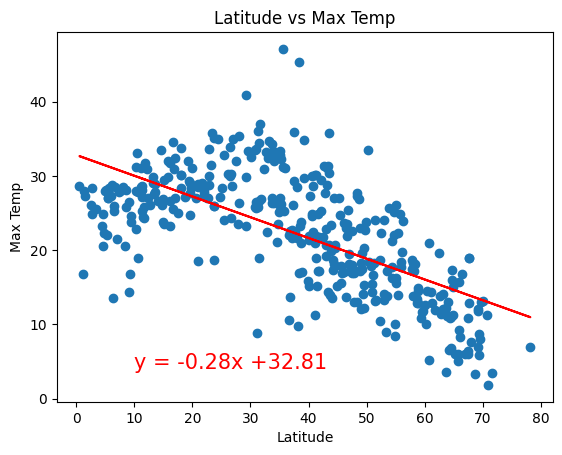

In [59]:
# Linear regression on Northern Hemisphere
linregressplots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (10,4))

The r^2 value is: 0.6876875706882019


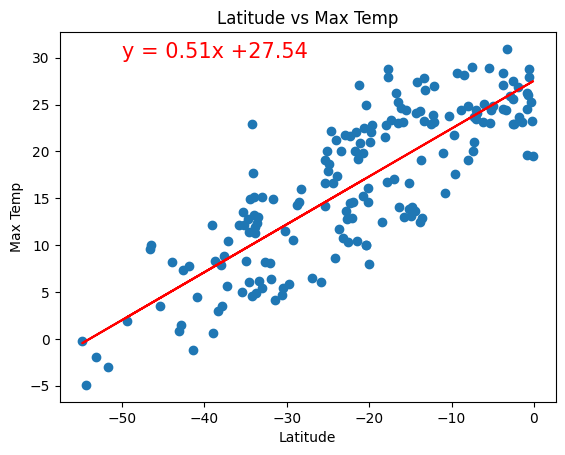

In [60]:
# Linear regression on Southern Hemisphere
linregressplots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', (-50,30))

**Discussion about the linear relationship:** In the northern hemisphere, there is a negative correlation between latitude and max temperature. This means that with increasing latitude, the temperature decreases. However, the correlation is not very strong due to the r^2 value being ~0.44, suggesting that the latitude explains about 44% of the variation in max temperature in the northern hemisphere. In the southern hemisphere, there is a positive correlation between latitude and max temperature. This means that with increasing latitude, the temperature increases. The correlation here is also not very strong due to the r^2 value being ~0.69, suggesting that the latitude explains about 69% of all the variation in max temperature in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.005877179565227666


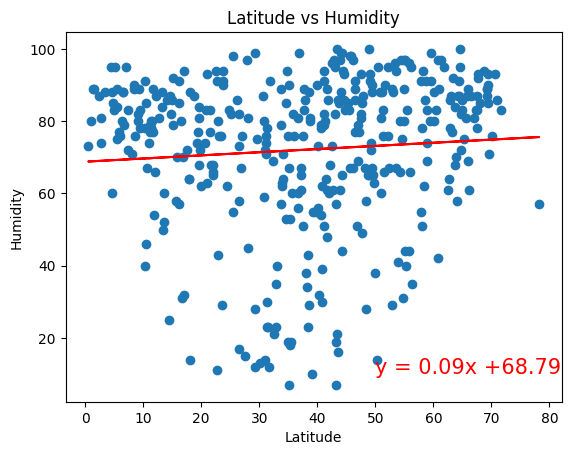

In [62]:
# Northern Hemisphere
linregressplots(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (50,10))

The r^2 value is: 0.0007401316453386226


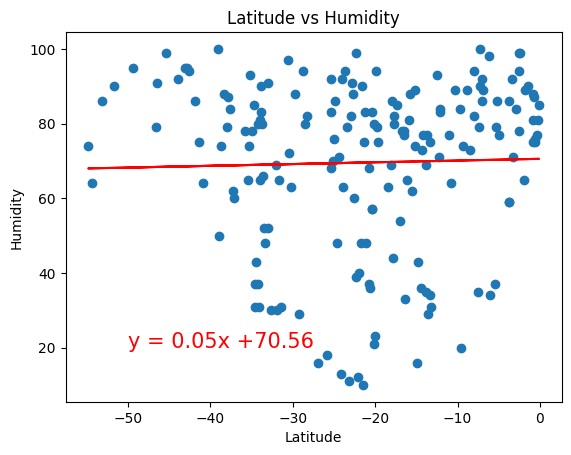

In [64]:
# Southern Hemisphere
linregressplots(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-50,20))

**Discussion about the linear relationship:** In the northern and southern hemispheres, there are slightly positive correlations between latitude and humidity. This means that with increasing latitude, the humidity slighlty increases. However, there seems to be no correlation between latitude and humidity due to the r^2 values being approximately zero for both models, suggesting that the latitude explains none of the variation in humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.01830572176515372


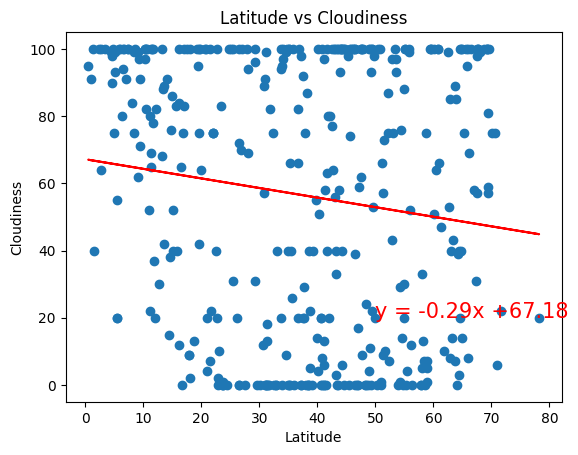

In [66]:
# Northern Hemisphere
linregressplots(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (50,20))

The r^2 value is: 0.00217520455703124


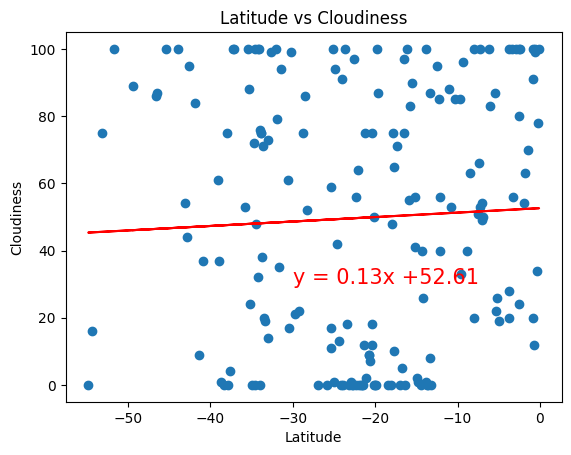

In [67]:
# Southern Hemisphere
linregressplots(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** In the northern hemisphere, there is a slightly negative correlation between latitude and cloudiness. This means that with increasing latitude, the cloudiness slightly decreases. In the southern hemisphere, there is a slighlty positive correlation between latitude and cloudiness, which means that the cloudiness slightly increaes with increasing latitude. However, there seems to be no correlation between latitude and cloudiness due to the r^2 values being approximately or close to zero for both models, suggesting that the latitude explains none of the variation in cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.005421701250955131


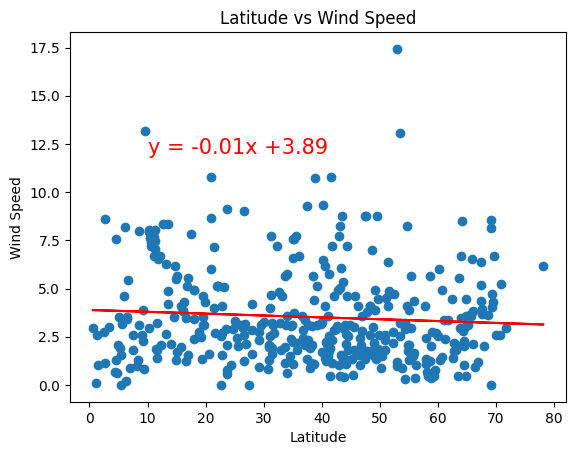

In [68]:
# Northern Hemisphere
linregressplots(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (10,12))

The r^2 value is: 0.02353024020710378


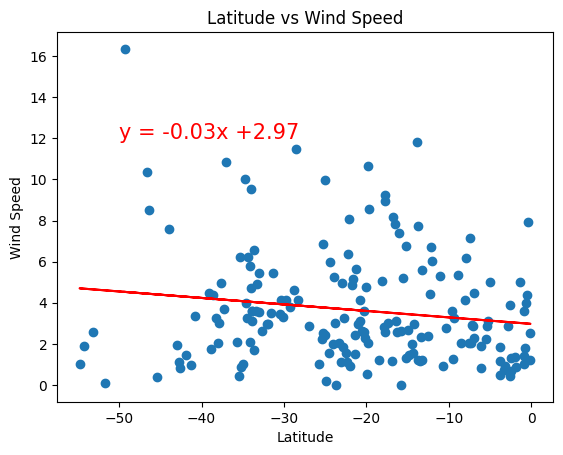

In [69]:
# Southern Hemisphere
linregressplots(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-50,12))

**Discussion about the linear relationship:** In the northern and southern hemispheres, there are slightly negative correlations between latitude and wind speed. This means that with increasing latitude, the wind speed slightly decreases. However, there seems to be no correlation between latitude and wind speed due to the r^2 values being approximately or close to zero for both models, suggesting that the latitude explains none of the variation in wind speed in both hemispheres.